Задание по варианту

Вариант 4
Изучается динамика потребления сахара в России. Для этого собраны данные
об объемах среднедушевого потребления сахара (г/сутки) Y(t) за 7 десятилетий.
Обосновать и построить тренд данного ряда. Оценить достоверность
уточненной по МНК модели.


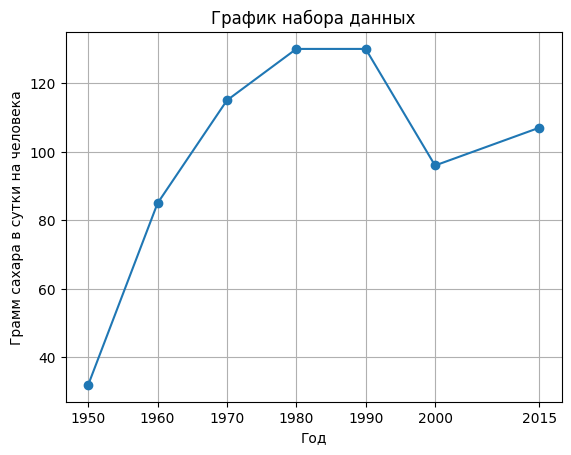

In [7]:
import numpy as np
from matplotlib import pyplot as plt

# Данные
Dataset = [32, 85, 115, 130, 130, 96, 107]
year = [1950, 1960, 1970, 1980, 1990, 2000, 2015]

# Создание графика
plt.plot(year, Dataset, marker='o')  # Используем маркеры для точек
plt.title('График набора данных')
plt.xlabel('Год')
plt.ylabel('Грамм сахара в сутки на человека')
plt.grid(True)
plt.xticks(year)  # Устанавливаем метки по оси X
plt.show()


In [ ]:
Dataset = [32, 85, 115, 130, 130, 96, 107]


Самостоятельно реализовать МНК для решения задачи поиска
коэффициентов модели, заданной в виде полинома второго порядка

In [18]:
# Данные
Dataset = [32, 85, 115, 130, 130, 96, 107]
n = len(Dataset)

# Создаем массив x от 0 до n-1
x = list(range(n))
print(x)

# Вычисляем необходимые суммы
sum_x = sum(x)
sum_y = sum(Dataset)
sum_x2 = sum(i**2 for i in x)
sum_x3 = sum(i**3 for i in x)
sum_x4 = sum(i**4 for i in x)
sum_xy = sum(x[i] * Dataset[i] for i in range(n))
sum_x2y = sum((x[i]**2) * Dataset[i] for i in range(n))

# Формируем систему уравнений
A = [
    [n, sum_x, sum_x2],
    [sum_x, sum_x2, sum_x3],
    [sum_x2, sum_x3, sum_x4]
]

B = [sum_y, sum_xy, sum_x2y]

# Решаем систему уравнений методом Гаусса
def gauss_elimination(A, B):
    n = len(B)
    # Прямой ход
    for i in range(n):
        # Нормализация строки
        factor = A[i][i]
        for j in range(i, n):
            A[i][j] /= factor
        B[i] /= factor
        
        # Обнуление под текущей строкой
        for j in range(i + 1, n):
            factor = A[j][i]
            for k in range(i, n):
                A[j][k] -= factor * A[i][k]
            B[j] -= factor * B[i]

    # Обратный ход
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = B[i] - sum(A[i][j] * x[j] for j in range(i + 1, n))
    return x

# Находим коэффициенты
coefficients = gauss_elimination(A, B)

# Вывод коэффициентов
print("Коэффициенты полинома второго порядка:")
print(f"a_0 = {coefficients[0]}, a_1 = {coefficients[1]}, a_2 = {coefficients[2]}")


[0, 1, 2, 3, 4, 5, 6]
Коэффициенты полинома второго порядка:
a_0 = 37.88095238095238, a_1 = 49.35714285714286, a_2 = -6.666666666666667


Поиск порядка полинома f2 c коэфицентами 1.36111111, -18.91666667,  76.57936508,  29.71428571

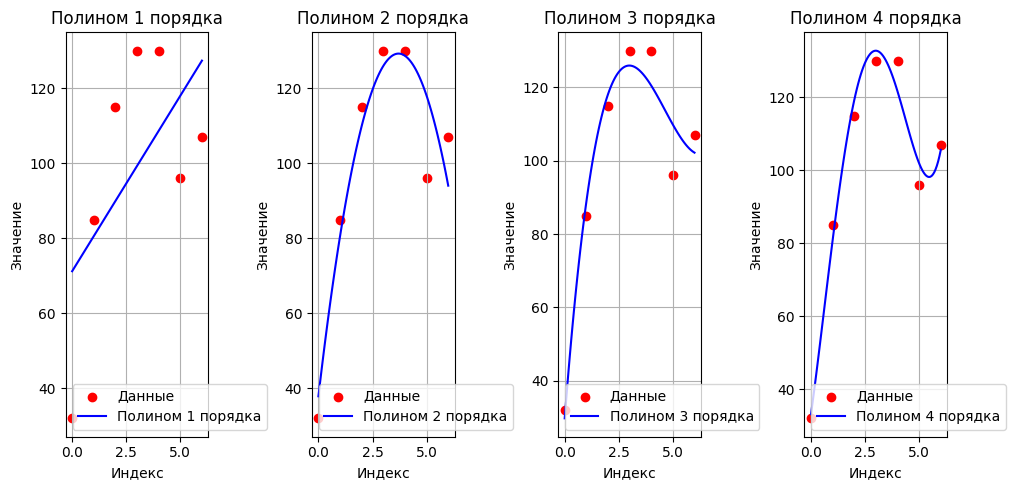

[array([ 9.35714286, 71.21428571]), array([-6.66666667, 49.35714286, 37.88095238]), array([  1.36111111, -18.91666667,  76.57936508,  29.71428571]), array([ 0.66287879, -6.59343434, 10.53409091, 43.05663781, 33.12337662])]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
Dataset = [32, 85, 115, 130, 130, 96, 107]
x = np.arange(len(Dataset))


max_order = 4 
coefficients = []
polynomials = []


for order in range(1, max_order + 1):
    coeff = np.polyfit(x, Dataset, order)
    coefficients.append(coeff)
    polynomial = np.poly1d(coeff)
    polynomials.append(polynomial)

# Генерируем значения y для графиков
x_fit = np.linspace(0, len(Dataset) - 1, 100)

# Визуализация
plt.figure(figsize=(10, 5))

# Построение графиков для каждого полинома на отдельных подграфиках
for i, polynomial in enumerate(polynomials):
    plt.subplot(1, max_order, i + 1)  # 1 строка, max_order столбцов
    y_fit = polynomial(x_fit)
    plt.scatter(x, Dataset, color='red', label='Данные')
    plt.plot(x_fit, y_fit, label=f'Полином {i + 1} порядка', color='blue')
    plt.title(f'Полином {i + 1} порядка')
    plt.xlabel('Индекс')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid()

# Показать графики
plt.tight_layout()  # Для лучшего размещения подграфиков
plt.show()
print(coefficients)



Аппроксимировать данные функциональной моделью вида f3

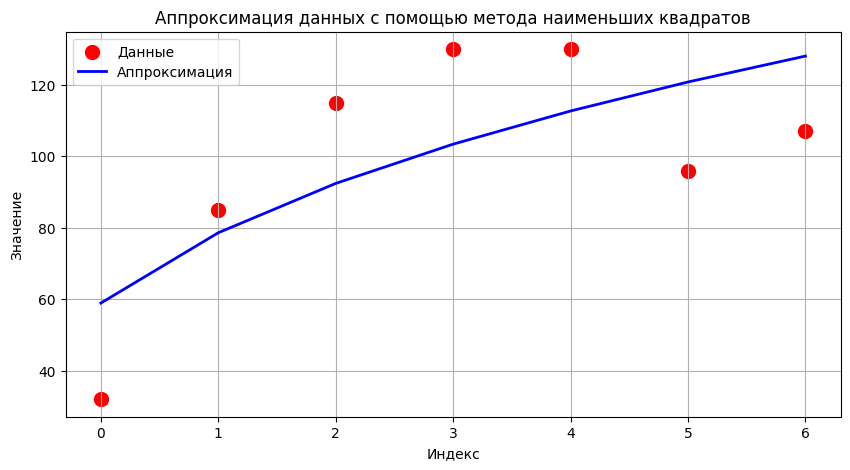

Коэффициенты: a = 75.76, b = -16.83


In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
Dataset = [32, 85, 115, 130, 130, 96, 107]
x = np.arange(len(Dataset))

# Преобразуем данные
X_transformed = np.cbrt(x + 1)  # Применяем кубический корень к x + 1
y = np.array(Dataset)

# Добавляем столбец единиц для свободного члена b
X = np.vstack((X_transformed, np.ones(len(X_transformed)))).T

# Метод наименьших квадратов для нахождения коэффициентов
# a, b = (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Извлекаем коэффициенты
a, b = coefficients

# Генерируем предсказанные значения
predicted_values = a * np.cbrt(x + 1) + b

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(x, Dataset, color='red', label='Данные', s=100)
plt.plot(x, predicted_values, label=f'Аппроксимация', color='blue', linewidth=2)
plt.title('Аппроксимация данных с помощью метода наименьших квадратов')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.legend()
plt.grid()
plt.show()

# Вывод коэффициентов
print(f"Коэффициенты: a = {a:.2f}, b = {b:.2f}")


Используя скорректированный коэффициент детерминации
определить наилучшую из трех моделей

In [37]:
def f1(x):
    #-6.66666667, 49.35714286, 37.88095238
    return 37.88095238095238+49.35714285714286*x+-6.666666666666667*x*x

def f2(x):
    #1.36111111, -18.91666667,  76.57936508,  29.71428571
    return 1.36111111*x*x*x-18.91666667*x*x+76.57936508*x+29.71428571

def f3(x):
    #75.76, b = -16.83
    return 75.76* np.cbrt(x+1)+-16.83

Dataset = [32, 85, 115, 130, 130, 96, 107]
x = np.arange(len(Dataset))


# Функция для вычисления R^2 и скорректированного R^2
def calculate_r_squared(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

def calculate_adjusted_r_squared(r_squared, n, p):
    return 1 - ((1 - r_squared) * (n - 1) / (n - p - 1))

# Вычисляем предсказанные значения для каждой модели
y_pred_f1 = f1(x)
y_pred_f2 = f2(x)
y_pred_f3 = f3(x)

# Количество наблюдений
n = len(Dataset)

# Вычисляем R^2 и скорректированный R^2 для каждой модели
r_squared_f1 = calculate_r_squared(Dataset, y_pred_f1)
adjusted_r_squared_f1 = calculate_adjusted_r_squared(r_squared_f1, n, 2)  # 2 предиктора для f1

r_squared_f2 = calculate_r_squared(Dataset, y_pred_f2)
adjusted_r_squared_f2 = calculate_adjusted_r_squared(r_squared_f2, n, 3)  # 3 предиктора для f2

r_squared_f3 = calculate_r_squared(Dataset, y_pred_f3)
adjusted_r_squared_f3 = calculate_adjusted_r_squared(r_squared_f3, n, 1)  # 1 предиктор для f3

# Вывод результатов
print(f"Модель f1: R^2 = {r_squared_f1:.4f}, скорректированный R^2 = {adjusted_r_squared_f1:.4f}")
print(f"Модель f2: R^2 = {r_squared_f2:.4f}, скорректированный R^2 = {adjusted_r_squared_f2:.4f}")
print(f"Модель f3: R^2 = {r_squared_f3:.4f}, скорректированный R^2 = {adjusted_r_squared_f3:.4f}")

# Сравнение моделей
best_model = max(
    [("f1", adjusted_r_squared_f1),
     ("f2", adjusted_r_squared_f2),
     ("f3", adjusted_r_squared_f3)],
    key=lambda x: x[1]
)

print(f"\nНаилучшая модель: {best_model[0]} с скорректированным R^2 = {best_model[1]:.4f}")

Модель f1: R^2 = 0.8918, скорректированный R^2 = 0.8377
Модель f2: R^2 = 0.9495, скорректированный R^2 = 0.8990
Модель f3: R^2 = 0.5182, скорректированный R^2 = 0.4219

Наилучшая модель: f2 с скорректированным R^2 = 0.8990


Сделать прогноз на один шаг. Указать, каким образом можно оценить
точность прогноза x = 7 (2025 год)


"Так объем потребления сахара в 2022 году в России составил 5 710 тыс. тонн" - https://rus-opros.com/about/articles/rynok-sahara/
38.9 кг на человека в год или 106,5 грамм

In [44]:
import numpy as np

# Данные
Dataset = np.array([32, 85, 115, 130, 130, 96, 107])
x = np.arange(len(Dataset))

def f2(x):
    #1.36111111, -18.91666667,  76.57936508,  29.71428571
    return 1.36111111*x*x*x-18.91666667*x*x+76.57936508*x+29.71428571

# Прогноз на один шаг вперед
next_x = len(Dataset)  # Следующий индекс
forecast = f2(next_x)

print(f"Прогноз на один шаг вперед (x = {next_x}): {forecast:.2f}")


Прогноз на один шаг вперед (x = 7): 105.71


Если у нас есть фактическое значение для следующего шага (например, мы знаем, что фактическое значение для x=7 равно 106), вы можете оценить точность прогноза следующим образом:

In [39]:
# Фактическое значение для x = 7
actual_value = 106

# Оценка точности прогноза
mae = abs(actual_value - forecast)
mse = (actual_value - forecast) ** 2
rmse = np.sqrt(mse)

print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Средняя квадратическая ошибка (MSE): {mse:.2f}")
print(f"Корень средней квадратической ошибки (RMSE): {rmse:.2f}")


Средняя абсолютная ошибка (MAE): 0.29
Средняя квадратическая ошибка (MSE): 0.08
Корень средней квадратической ошибки (RMSE): 0.29
